__Задача 1__

Даны значения зарплат из выборки выпускников: 
```
100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150
```
Своими руками (т.е. без использования статистических функций вроде `mean`, `std`, `var`) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [83]:
import numpy as np
from matplotlib import pyplot as plt

In [48]:
db=np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150])

Среднее арифметическое:

In [49]:
db_mean=db.sum()/db.size
db_mean

73.14285714285714

In [50]:
#проверка
db.mean()

73.14285714285714

Смещенная оценка дисперсии:

In [51]:
db_var=((db-db_mean)**2).sum()/db.size
db_var

2135.0748299319725

In [52]:
#проверка
db.var()

2135.0748299319725

Несмещенная оценка дисперсии:

In [53]:
db_var_1=((db-db_mean)**2).sum()/(db.size-1)
db_var_1

2241.828571428571

In [54]:
#проверка
db.var(ddof=1)

2241.828571428571

Среднеквадратичные отклонения

In [55]:
np.sqrt(db_var), np.sqrt(db_var_1)

(46.206869943028735, 47.347952135531386)

__Задача 2__

Для выборки из задачи 1 найти (также без использования статистических функций) медиану, первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из `boxplot`. 

В этой задаче неоднозначности в вычислении квантилей можно разрешать любым способом.

In [60]:
db.sort()
db

array([ 17,  24,  25,  30,  33,  45,  55,  57,  65,  65,  70,  75,  75,
        77,  80,  84,  89,  90, 100, 150, 230])

Медиана находим следующим образом. Сортируем выборку, смотрим ее размер. Если количество нечетное, то число выборка//2+1 и есть медиана.  

Так как отсчет в python идет с нуля, а не с единицы, то 11-й элемент выборки (медиана), будем иметь индекс 10, то есть выборка//2

In [64]:
db[(db.size//2)]

70

In [72]:
np.median(db)

70.0

Первый квартиль:

In [74]:
db[(db.size//2)//2]

45

In [75]:
np.quantile(db,0.25)

45.0

Третий квартиль:

In [76]:
db[(db.size//2)//2+db.size//2]

84

In [77]:
np.quantile(db,0.75)

84.0

Интерквартильное расстояние:

In [80]:
# элементы в интерквартиле
db[(db.size//2)//2:(db.size//2)//2+db.size//2]

array([45, 55, 57, 65, 65, 70, 75, 75, 77, 80])

In [81]:
#количество элементов в интерквартиле
db[(db.size//2)//2:(db.size//2)//2+db.size//2].size

10

In [101]:
#Интерквартильный размах
db[(db.size//2)//2+db.size//2]-db[(db.size//2)//2]

39

{'whiskers': [<matplotlib.lines.Line2D at 0x9e9bda0>,
 'caps': [<matplotlib.lines.Line2D at 0x9eb34a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x9e9b9b0>],
 'medians': [<matplotlib.lines.Line2D at 0x9eb3b38>],
 'fliers': [<matplotlib.lines.Line2D at 0x9eb3e80>],
 'means': []}

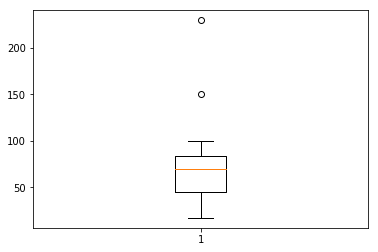

In [87]:
plt.boxplot(db)

Выпадов 2 шт и они находятся в интервале большее 100

In [93]:
db[db>100]

array([150, 230])

__Задача 3__

В университет на факультеты `A` и `B` поступило равное количество студентов, а на факультет `C` студентов поступило столько же, сколько на `A` и `B` вместе. Вероятность того, что студент факультета `A` сдаст первую сессию, равна 0.8. Для студента факультета `B` эта вероятность равна 0.7, а для студента факультета `C` - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете `A`? б) на факультете `B`? в) на факультете `C`?

_Замечание_: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

$A$ - попадание в мишень

$B_1, B_2, B_3$ - студент учится на факультете $A, B, C$ соответственно

$P(A|B_1)=0.8, P(A|B_2)=0.7, P(A|B_3)=0.9 $ - вероятности, что студент факультета $A, B, C$ соответственно сдал экзамен

$P(B_1)=0.25, P(B_2)=0.25, P(B_3)=0.5 $ - вероятности, что студент учится на факультете  $A, B, C$ соответственно 

Найдем безусловную вероятность попадания в мишень $P(A)$

$$P(A) = P(A | B_1) \cdot P(B_1) + P(A | B_2) \cdot P(B_2) + P(A | B_3) \cdot P(B_3) = 0.8\cdot0.25+0.7\cdot0.25+0.9\cdot0.5=0.825$$

In [94]:
0.8*0.25+0.7*0.25+0.9*0.5

0.825

По формуле Байеса найдем искомые вероятности:
$$P(B_1|A) = \frac{P(A|B_1) \cdot P(B_1)}{P(A)}$$

Вероятность, что студент учится на факультете A:

In [95]:
(0.8*0.25)/0.825

0.24242424242424246

Вероятность, что студент учится на факультете B:

In [96]:
(0.7*0.25)/0.825

0.21212121212121213

Вероятность, что студент учится на факультете C:

In [97]:
(0.9*0.5)/0.825

0.5454545454545455

Проверка суммы вероятностей:

In [98]:
(0.8*0.25)/0.825+(0.7*0.25)/0.825+(0.9*0.5)/0.825

1.0